Maria Paula Oviedo Saldaña

Miguel Angel Valero

David Valencia Gomez

In [23]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly

In [24]:
activity_01 = pd.read_csv("/content/activity_1_ml.csv")

In [25]:
activity_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   WAGE        490 non-null    float64
 1   EDUC        552 non-null    int64  
 2   EXPER       552 non-null    int64  
 3   GENDER      549 non-null    object 
 4   FAM_STATUS  469 non-null    object 
 5   TENURE      552 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 26.0+ KB


In [26]:
activity_01.drop(columns="EDUC",
                 inplace=True)

In [27]:
activity_01

,WAGE,EXPER,GENDER,FAM_STATUS,TENURE
0,10.00,3,male,MARRIED,2
1,3.50,2,female,alone,0
2,3.30,5,female,single,0
3,5.00,15,male,married,5
4,11.25,28,male,married,25
...,...,...,...,...,...
547,3.00,9,male,NaN,0
548,7.63,8,female,single,4
549,4.50,36,female,married,6
550,NaN,28,male,married,3


In [30]:
#Errores Explicitos
activity_01.duplicated().sum()

17

In [32]:
activity_01

,WAGE,EXPER,GENDER,FAM_STATUS,TENURE
0,10.00,3,male,MARRIED,2
1,3.50,2,female,alone,0
2,3.30,5,female,single,0
3,5.00,15,male,married,5
4,11.25,28,male,married,25
...,...,...,...,...,...
530,2.90,1,male,single,2
531,3.25,14,female,married,2
532,7.63,8,female,single,4
533,NaN,28,male,married,3


In [33]:
activity_01['FAM_STATUS'].unique()

array(['MARRIED', 'alone', 'single', 'married', nan, 'SINGLE'],
      dtype=object)

In [34]:
dictio_correct_1 ={'MARRIED':'married',
                'SINGLE':'single',
                'alone':'single',
                'married' : 'married',
                'single' : 'single'}

In [35]:
activity_01['FAM_STATUS']=activity_01['FAM_STATUS'].map(dictio_correct_1)

In [36]:
activity_01['FAM_STATUS'].unique()

array(['married', 'single', nan], dtype=object)

In [37]:
activity_01['GENDER'].unique()


array(['male', 'female', 'MALE', 'FEMALE', 'man', 'woman', nan],
      dtype=object)

In [40]:
dictio_correct_2 ={'male':'male',
                'female':'female',
                'MALE':'male',
                'FEMALE' : 'female',
                   'man' : 'male',
                   'woman' : 'female'}


In [41]:
activity_01['GENDER']=activity_01['GENDER'].map(dictio_correct_2)

In [42]:
activity_01['GENDER'].unique()

array(['male', 'female', nan], dtype=object)

In [31]:
#Se eliminaran los errores encontrados
activity_01.drop_duplicates(inplace=True)
activity_01.reset_index(drop=True, inplace=True)

In [45]:
 activity_01.dropna()

,WAGE,EXPER,GENDER,FAM_STATUS,TENURE
0,10.00,3,male,married,2
1,3.50,2,female,single,0
2,3.30,5,female,single,0
3,5.00,15,male,married,5
4,11.25,28,male,married,25
...,...,...,...,...,...
529,6.46,27,male,married,0
530,2.90,1,male,single,2
531,3.25,14,female,married,2
532,7.63,8,female,single,4


In [46]:
activity_01  = activity_01.dropna()

In [47]:
#Valores nulos
activity_01.isna().sum()

WAGE          0
EXPER         0
GENDER        0
FAM_STATUS    0
TENURE        0
dtype: int64

In [48]:
fem = activity_01['GENDER'].value_counts()
fem.index = ['m', 'f']

In [49]:
fem

m    206
f    197
Name: GENDER, dtype: int64

<BarContainer object of 2 artists>

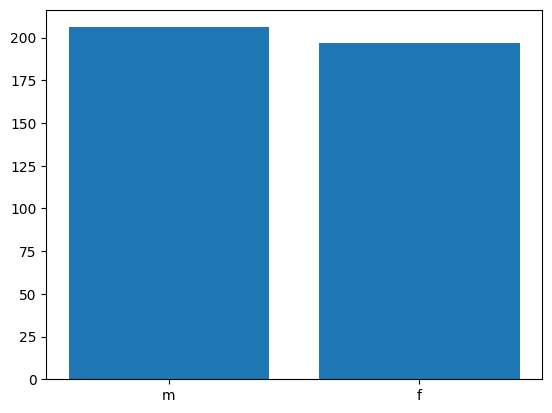

In [50]:
plt.bar(fem.index, fem.values)


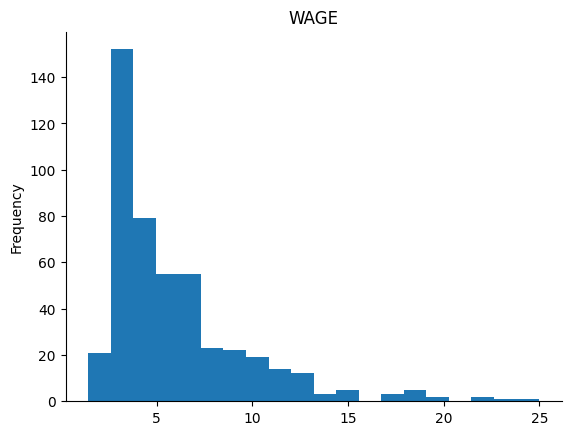

In [18]:
#WAGE
activity_01['WAGE'].plot(kind='hist', bins=20, title='WAGE')
plt.gca().spines[['top', 'right',]].set_visible(False)

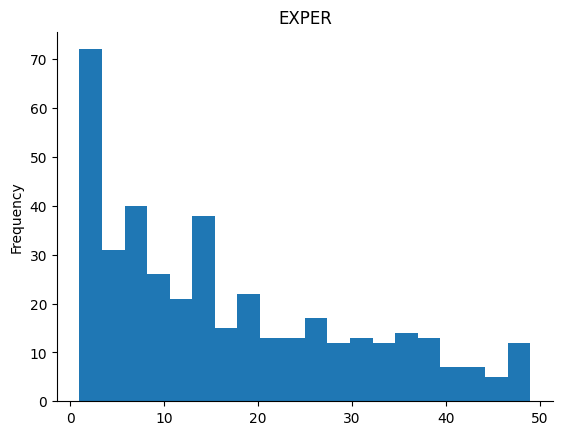

In [51]:

activity_01['EXPER'].plot(kind='hist', bins=20, title='EXPER')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [53]:
fam = activity_01['FAM_STATUS'].value_counts()
fam.index = ['married', 'single']

In [55]:
fam

married    245
single     158
Name: FAM_STATUS, dtype: int64

<BarContainer object of 2 artists>

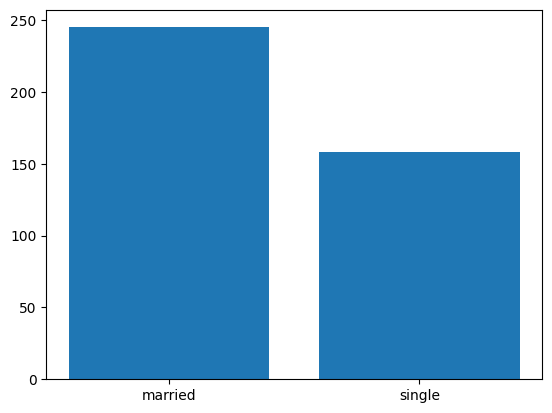

In [57]:
plt.bar(fam.index, fam.values)


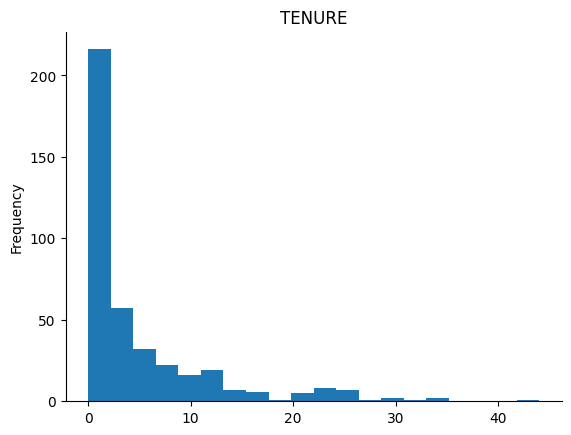

In [59]:
activity_01['TENURE'].plot(kind='hist', bins=20, title='TENURE')
plt.gca().spines[['top', 'right',]].set_visible(False)

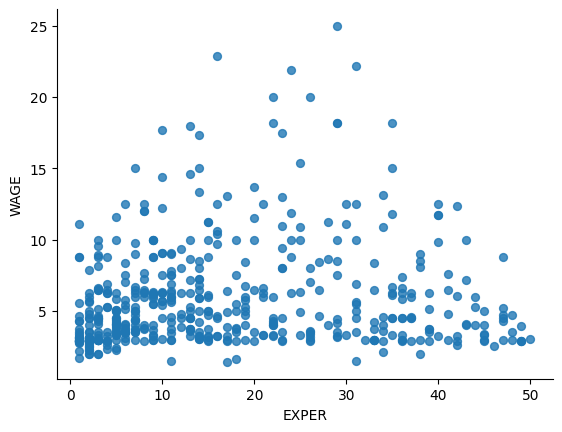

In [28]:
#EXPER VS WAGE
activity_01.plot(kind='scatter', x='EXPER', y='WAGE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

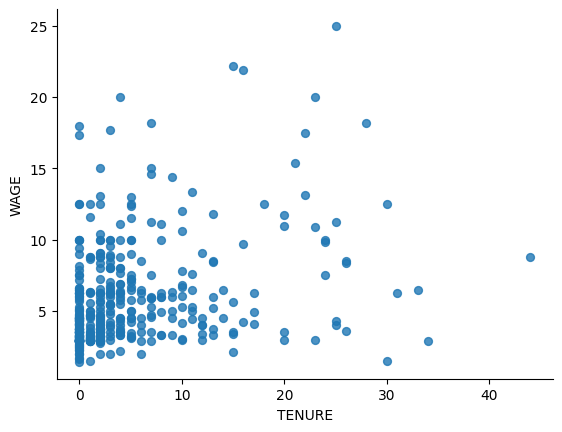

In [60]:
activity_01.plot(kind='scatter', x='TENURE', y='WAGE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='FAM_STATUS', ylabel='WAGE'>

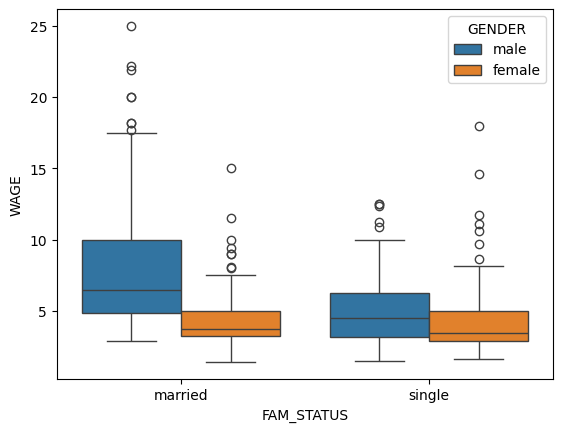

In [61]:
sns.boxplot(data=activity_01, x='FAM_STATUS', y='WAGE', hue='GENDER') #segunda grafica bloxplot